In [1]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from yellowbrick.classifier import ConfusionMatrix

In [3]:
with open('./models-pkl/census.pkl', 'rb') as f:
    x_census_treino, x_census_teste, y_census_treino, y_census_teste = pickle.load(f)

In [7]:
x_census_treino.shape, y_census_treino.shape

((39073, 108), (39073,))

In [10]:
x_census_teste.shape, y_census_teste.shape

((9769, 108), (9769,))

In [14]:
naive_census = GaussianNB()
naive_census.fit(x_census_treino, y_census_treino)
previsor = naive_census.predict(x_census_teste)


In [16]:
accuracy_score(y_census_teste, previsor)


0.5248234210256936

0.5248234210256936

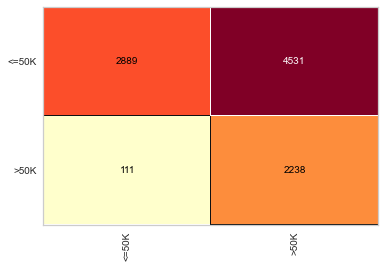

In [18]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treino, y_census_teste)
cm.score(x_census_teste, y_census_teste)

In [19]:
print(classification_report(y_census_teste, previsor))

              precision    recall  f1-score   support

       <=50K       0.96      0.39      0.55      7420
        >50K       0.33      0.95      0.49      2349

    accuracy                           0.52      9769
   macro avg       0.65      0.67      0.52      9769
weighted avg       0.81      0.52      0.54      9769

